![Credits To wikipedia](https://cdn.substack.com/image/fetch/f_auto,q_auto:good,fl_progressive:steep/https%3A%2F%2Fbucketeer-e05bbc84-baa3-437e-9518-adb32be77984.s3.amazonaws.com%2Fpublic%2Fimages%2Fa4ee0558-f0ab-41a4-b439-1557e0702541_602x1243.jpeg)
# Introduction

## Context
This is an attempt to document the human cost of Israel-Palestine conflict. The Israeli–Palestinian conflict is one of the world's most enduring conflicts, with the Israeli occupation of the West Bank and the Gaza Strip reaching 54 years of conflict. Various attempts have been made to resolve the conflict as part of the Israeli–Palestinian peace process.
In the year 2000, the relations between both states severely deteriorated with the eruption of the Al-Aqsa Intifada – a rapid escalation of the Israeli–Palestinian conflict. The events calmed down in 2005, with reconciliation and cease fire. The situation became more complicated with the split of the Palestinian Authority in 2007, the violent split of Fatah and Hamas factions, and Hamas' takeover of the Gaza Strip.

## Content
The datasets contain injuries and fatalities data from both sides from 2000 - 2021. It has year, month, number of people killed and injured from Israel and Palestine. There are 111,475 people injured and 10,000 killed from Palestine and another 5,160 people injured and 1,275 killed from Israel. The House Demolition dataset further helps us analyse the loss of infrastructure caused by warfare.

## Investigative Questions
#### -Which Years Have Seen Most Bloodshed In The Region?
#### -What Is The Countrywise Share Of Casualties?
#### -Compare The Decadal Change In Total Casualties
#### -Investigate The Reasons For Casualties Faced By Israelis In Their Worst Year Of Crisis
#### -Investigate The Reasons For Casualties Faced By Palestinians In Their Worst Year Of Crisis
#### -Is There Any Significant Rise Or Decline In Casualties With Respect To Different Months Of Year?
#### -Are Highest Casualties In Given Years Consistent With The Destruction Of Infrastruture?
#### -Analyse The Effects Of 2014 Invasion By Israeli Military
#### -Analyse The 2007 Battle Of Gaza 
![Credits To India Today](https://akm-img-a-in.tosshub.com/indiatoday/images/story/202105/Iron_Dome_1200.jpg?e8zqArc6LvBZ5MI4hxW099t9l_FHvH.h&size=1200:675)
Credits To India Today For Picture

In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [6]:
df=pd.read_csv("House Demolitions in Palestine.csv")

In [7]:
df1=pd.read_csv("Palestine Body Count.csv")

# PREPROCESSING & WRANGLING OF DATA

In [8]:
df=df.sort_values(by="Year",ascending=True)
df.head()

,Year,Housing Units,People Left Homeless,Minors Left Homeless,Area,Type of Structure,Demolish Scope,District,Demolition Reason,Demolition carried out by
268,2004.0,8,66,0,Gaza Strip,Residential Structure,Complete Demolition,Rafah,Demolition of houses as punishment,NaN
245,2004.0,53,194,110,East Jerusalem,Residential Structure,NaN,East Jerusalem,Demolition on the pretext of unlawful construc...,Authorities
246,2004.0,27,138,0,Gaza Strip,Residential Structure,Complete Demolition,Deir al-Balah,Demolition for alleged military purposes,NaN
247,2004.0,64,123,0,Gaza Strip,Residential Structure,Complete Demolition,Gaza,Demolition for alleged military purposes,NaN
248,2004.0,408,"3,023",0,Gaza Strip,Residential Structure,Complete Demolition,Khan Yunis,Demolition for alleged military purposes,NaN


In [9]:
df1=df1.sort_values(by="Year",ascending=True)
df1.head()

,Year,Month,Palestinians Injuries,Israelis Injuries,Palestinians Killed,Israelis Killed
0,2000.0,DECEMBER,781,NaN,51,8
1,2000.0,NOVEMBER,3838,NaN,112,22
2,2000.0,OCTOBER,5984,NaN,104,10
3,2000.0,SEPTEMBER,NaN,NaN,16,1
15,2001.0,JANUARY,471,NaN,19,6


In [10]:
df.count()

Year                         269
Housing Units                270
People Left Homeless         270
Minors Left Homeless         269
Area                         269
Type of Structure            269
Demolish Scope                97
District                     269
Demolition Reason            269
Demolition carried out by     52
dtype: int64

In [11]:
df1.count()

Year                     249
Month                    249
Palestinians Injuries    196
Israelis Injuries        133
Palestinians Killed      250
Israelis Killed          250
dtype: int64

## Fixing Errors With Dataset Using An Assortment Of Typical And Heuristic Ways

In [12]:
df=df.drop(axis=1,columns=["Demolition Reason","Demolition carried out by","Demolish Scope"])

In [13]:
df1=df1.iloc[0:249]
df1['Palestinians Injuries']=df1['Palestinians Injuries'].replace("(incl. Jun)", np.nan)
df1['Israelis Injuries']=df1['Israelis Injuries'].replace("(incl. Jun)", np.nan)
df1['Palestinians Injuries']=df1['Palestinians Injuries'].replace("(incl. Aug)", np.nan)
df1['Israelis Injuries']=df1['Israelis Injuries'].replace("(incl. Aug)", np.nan)
df1.fillna(value=0,inplace=True)
df1["Year"]=df1["Year"].apply(int)
df1["Palestinians Killed"]=df1["Palestinians Killed"].apply(int)
df1["Israelis Killed"]=df1["Israelis Killed"].apply(int)
df1["Israelis Injuries"] = df1["Israelis Injuries"].apply(int)
df1["Palestinians Injuries"] = df1["Palestinians Injuries"].apply(int)
df1["Palestinians Injuries"].iloc[165]=0
df1["Israelis Injuries"].iloc[165]=0
df1["Palestinians Injuries"].iloc[203]=0
df1["Israelis Injuries"].iloc[203]=0
df1["Month"].iloc[203]="MAY"
df1["Month"].iloc[227]="MAY"
df1["Month"].iloc[239]="MAY"


C:\Users\1411t\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [14]:
# Fixing string issues with data column "People Left Homeless" 
for i in range(len(df)):
    if df["People Left Homeless"].iloc[i]=="3,023":
        df["People Left Homeless"].iloc[i]=int(3023)
    elif df["People Left Homeless"].iloc[i]=="6,325":
        df["People Left Homeless"].iloc[i]=int(6325)
    elif df["People Left Homeless"].iloc[i]=="1,118":
        df["People Left Homeless"].iloc[i]=int(1118)  

In [15]:
df

,Year,Housing Units,People Left Homeless,Minors Left Homeless,Area,Type of Structure,District
268,2004.0,8,66,0,Gaza Strip,Residential Structure,Rafah
245,2004.0,53,194,110,East Jerusalem,Residential Structure,East Jerusalem
246,2004.0,27,138,0,Gaza Strip,Residential Structure,Deir al-Balah
247,2004.0,64,123,0,Gaza Strip,Residential Structure,Gaza
248,2004.0,408,3023,0,Gaza Strip,Residential Structure,Khan Yunis
...,...,...,...,...,...,...,...
6,2021.0,1,0,0,The West Bank (Excluding East Jerusalem),Residential Structure,Qalqiliya
0,2021.0,8,31,14,The West Bank (Excluding East Jerusalem),Residential Structure,Al-Quds
269,NaN,NaN,NaN,NaN,NaN,NaN,NaN
270,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df=df.dropna(axis=0)

In [17]:
df

,Year,Housing Units,People Left Homeless,Minors Left Homeless,Area,Type of Structure,District
268,2004.0,8,66,0,Gaza Strip,Residential Structure,Rafah
245,2004.0,53,194,110,East Jerusalem,Residential Structure,East Jerusalem
246,2004.0,27,138,0,Gaza Strip,Residential Structure,Deir al-Balah
247,2004.0,64,123,0,Gaza Strip,Residential Structure,Gaza
248,2004.0,408,3023,0,Gaza Strip,Residential Structure,Khan Yunis
...,...,...,...,...,...,...,...
9,2021.0,8,27,15,East Jerusalem,Residential Structure,East Jerusalem
11,2021.0,5,0,0,East Jerusalem,Non Residential Structure,East Jerusalem
12,2021.0,2,6,4,The West Bank (Excluding East Jerusalem),Residential Structure,Jenin
6,2021.0,1,0,0,The West Bank (Excluding East Jerusalem),Residential Structure,Qalqiliya


In [18]:
df["Year"]=df["Year"].apply(int)
df["Housing Units"]=df["Housing Units"].apply(int)
df["Minors Left Homeless"]=df["Minors Left Homeless"].apply(int)
df["People Left Homeless"]=df["People Left Homeless"].apply(int)

<ipython-input-18-70d57527b2b0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Year"]=df["Year"].apply(int)
<ipython-input-18-70d57527b2b0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Housing Units"]=df["Housing Units"].apply(int)
<ipython-input-18-70d57527b2b0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

### CREATING NEW COLUMNS FOR BETTER CASUALTY ANALYSIS

In [19]:
df1["Palestinian Casualties"]=(df1["Palestinians Killed"]+df1["Palestinians Injuries"])
df1["Israelis Casualties"]=(df1["Israelis Killed"]+df1["Israelis Injuries"])
df1["Total Casualties"]=(df1["Palestinian Casualties"]+df1["Israelis Casualties"])

In [20]:
df1.head()

,Year,Month,Palestinians Injuries,Israelis Injuries,Palestinians Killed,Israelis Killed,Palestinian Casualties,Israelis Casualties,Total Casualties
0,2000,DECEMBER,781,0,51,8,832,8,840
1,2000,NOVEMBER,3838,0,112,22,3950,22,3972
2,2000,OCTOBER,5984,0,104,10,6088,10,6098
3,2000,SEPTEMBER,0,0,16,1,16,1,17
15,2001,JANUARY,471,0,19,6,490,6,496


In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 249 entries, 0 to 248
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Year                    249 non-null    int64 
 1   Month                   249 non-null    object
 2   Palestinians Injuries   249 non-null    int64 
 3   Israelis Injuries       249 non-null    int64 
 4   Palestinians Killed     249 non-null    int64 
 5   Israelis Killed         249 non-null    int64 
 6   Palestinian Casualties  249 non-null    int64 
 7   Israelis Casualties     249 non-null    int64 
 8   Total Casualties        249 non-null    int64 
dtypes: int64(8), object(1)
memory usage: 19.5+ KB


In [22]:
df.isnull().sum()

Year                    0
Housing Units           0
People Left Homeless    0
Minors Left Homeless    0
Area                    0
Type of Structure       0
District                0
dtype: int64

# DATA ANALYSIS & STORYTELLING

In [23]:
dfnet=df.groupby(['Year']).sum()
df1net=df1.groupby(['Year']).sum()
dfnet

,Housing Units,People Left Homeless,Minors Left Homeless
Year,,,
2004,1633,11805,110
2005,89,214,78
2006,448,2473,96
2007,146,668,340
2008,162,772,422
2009,77,502,207
2010,122,612,302
2011,182,979,463
2012,147,633,326


In [24]:
df1net

,Palestinians Injuries,Israelis Injuries,Palestinians Killed,Israelis Killed,Palestinian Casualties,Israelis Casualties,Total Casualties
Year,,,,,,,
2000,10603,0,283,41,10886,41,10927
2001,6386,0,470,192,6856,192,7048
2002,4382,0,1032,419,5414,419,5833
2003,2992,0,588,185,3580,185,3765
2004,4009,0,786,104,4795,104,4899
2005,1385,493,190,51,1575,544,2119
2006,3199,377,665,20,3864,397,4261
2007,15426,322,385,12,15811,334,16145
2008,0,0,886,39,886,39,925


In [25]:
df1net["Total Casualties"].sum()

127442

In [26]:
df1net["Israelis Killed"].sum()

1275

In [27]:
df1net["Palestinians Killed"].sum()

10000

In [28]:
dfnet["People Left Homeless"].sum()

25730

In [29]:
dfnet["Minors Left Homeless"].sum()

5998

In [30]:
dfnet["Housing Units"].sum()

5497

## Basic Overview Statistics Of Conflict
###  127442 People have been killed or injured in the last 20 years of conflict
###  1275 Israelis have been killed in the last 20 years of conflict
###  10000 Palestinians have been killed in the last 20 years of conflict
###  25730 People have been left homeless in the last 20 years of conflict
### 5998 Minors have been left homeless in the last 20 years of conflict
###  5497 Housing Units have been demolished somehow due to the conflict

In [31]:
Isr=1275
Pal=10000
print("Percentage Of Israeli Deaths Is",Isr*100/(Isr+Pal))
print("Percentage Of Palestinians Deaths Is",Pal*100/(Isr+Pal))

Percentage Of Israeli Deaths Is 11.30820399113082
Percentage Of Palestinians Deaths Is 88.69179600886918


Israeli Deaths Comprised Of 11.3% Of Overall Deaths

Palestinian Deaths Comprised Of 88.6% Of Overall Deaths

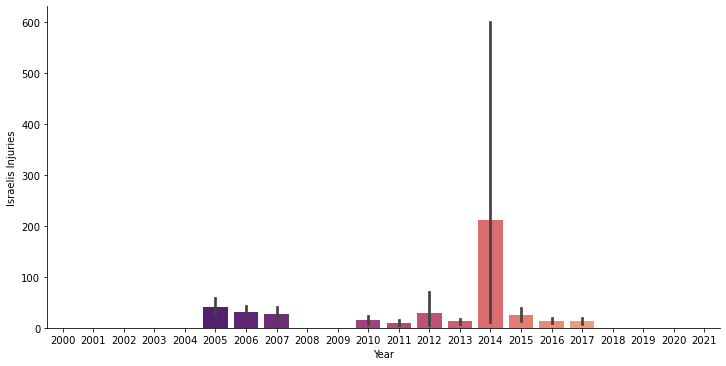

In [32]:
sns.catplot(x='Year', y='Israelis Injuries', data=df1, palette='magma',aspect=2,kind="bar")

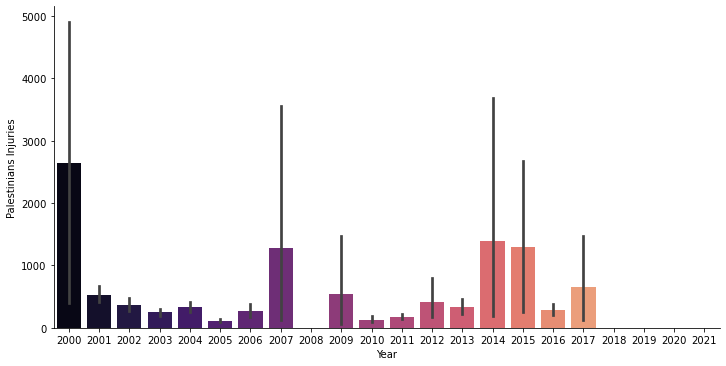

In [33]:
sns.catplot(x='Year', y='Palestinians Injuries', data=df1, palette='magma',aspect=2,kind="bar")

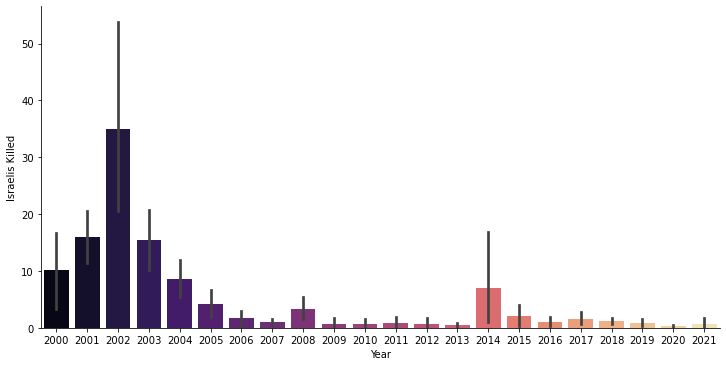

In [34]:
sns.catplot(x='Year', y='Israelis Killed', data=df1, palette='magma',aspect=2,kind="bar")

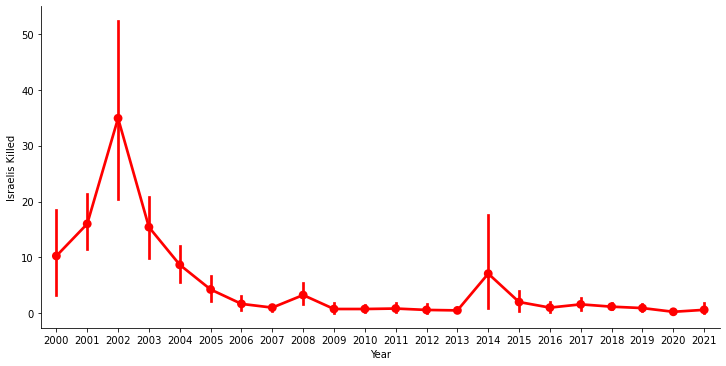

In [35]:
sns.catplot(x='Year', y='Israelis Killed', data=df1, color='red',aspect=2,kind="point")

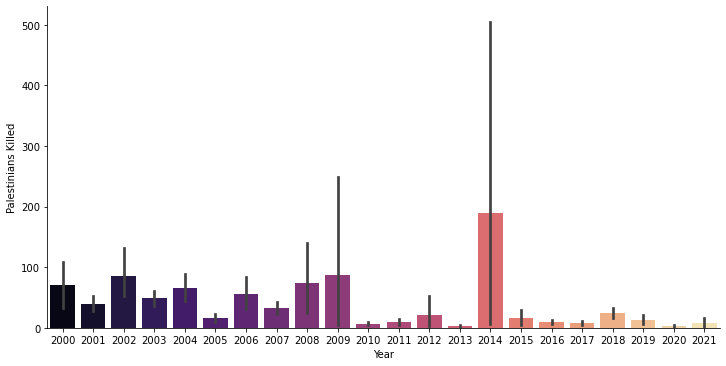

In [36]:
sns.catplot(x='Year', y='Palestinians Killed', data=df1, palette='magma',aspect=2,kind="bar")

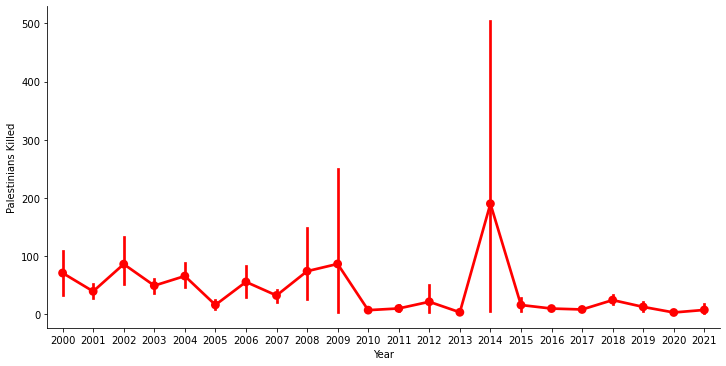

In [37]:
sns.catplot(x='Year', y='Palestinians Killed', data=df1, color='red',aspect=2,kind="point")

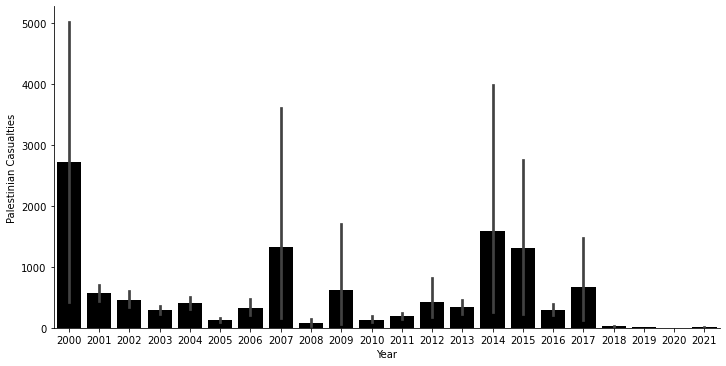

In [38]:
sns.catplot(x='Year', y='Palestinian Casualties', data=df1, color="black",aspect=2,kind="bar")

### The worst crisis year for Palestinians was 2000. It was the year of the camp david summit and Second intifada violence. 
### https://en.wikipedia.org/wiki/Second_Intifada
### https://en.wikipedia.org/wiki/2000_Camp_David_Summit

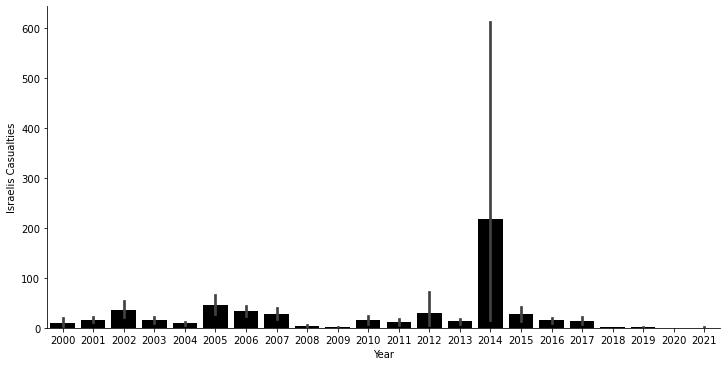

In [39]:
sns.catplot(x='Year', y='Israelis Casualties', data=df1, color="black",aspect=2,kind="bar")

### The worst crisis year for Israelis was 2014. It was year of the invasion of Gaza by Israel( also known as Operation Protective Edge or Gaza war).

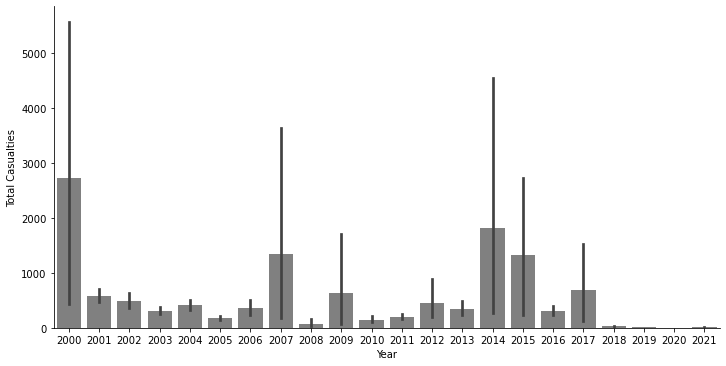

In [40]:
sns.catplot(x='Year', y='Total Casualties', data=df1, color="grey",aspect=2,kind="bar")

## The analysis shows us that the years 2000, 2007, 2014 And 2015 saw highest bloodshed with 2014 being the worst. The graphs show that the 2014-15 period was very gruesome as more than 35000 people were killed or injured in those two years. We will further analyse the reasons for each of the years.

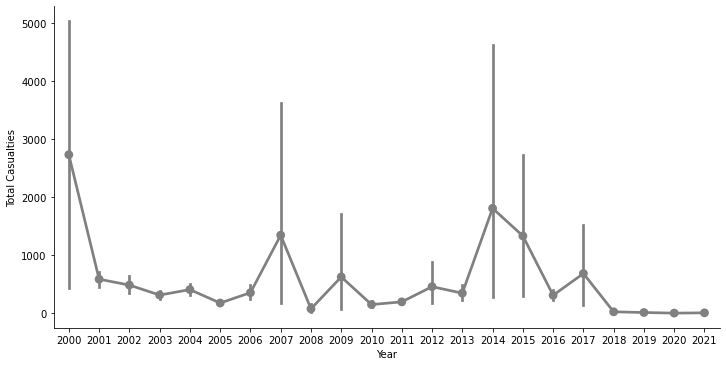

In [41]:
sns.catplot(x='Year', y='Total Casualties', data=df1, color="grey",aspect=2,kind="point")

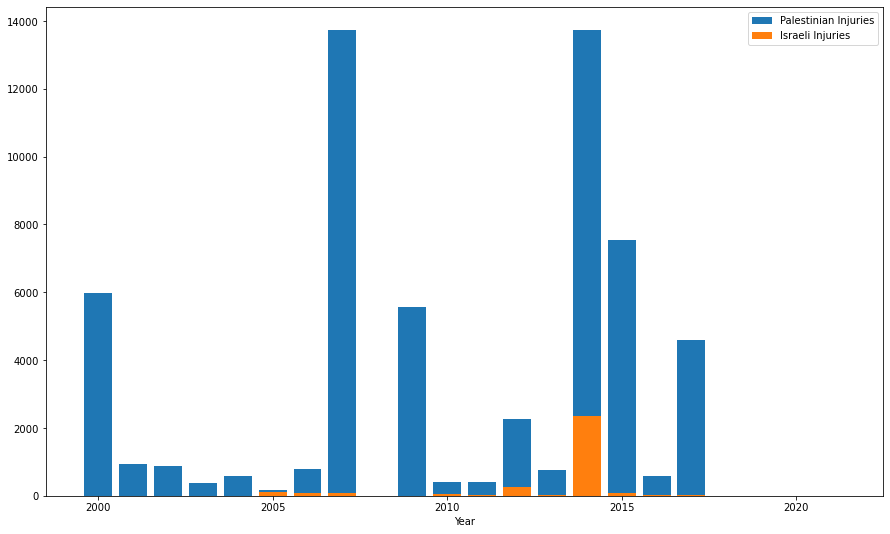

In [42]:
plt.figure(figsize=(15,9))
plt.bar(df1['Year'],df1['Palestinians Injuries'] , label = "Palestinian Injuries" ) 
plt.bar(df1['Year'],df1['Israelis Injuries'] , label = "Israeli Injuries")
plt.xlabel('Year')
plt.legend()
plt.show()

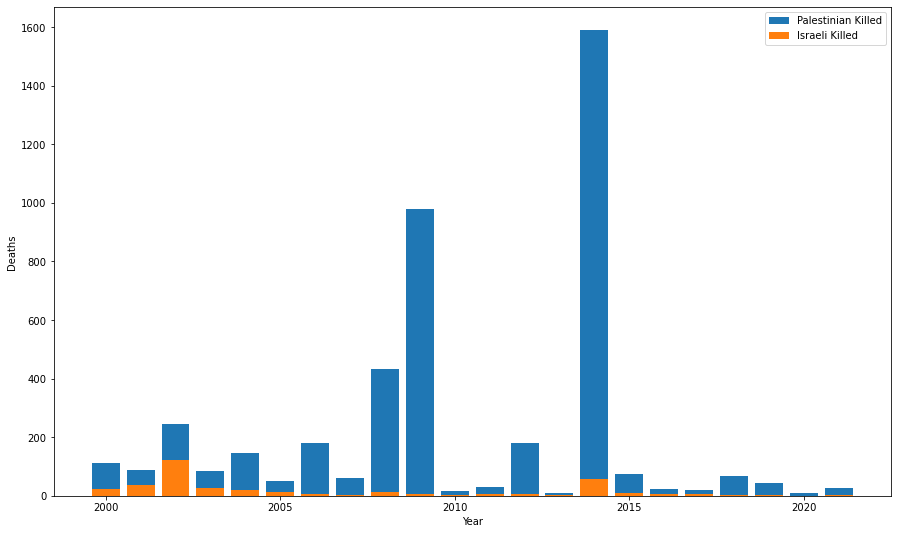

In [43]:
plt.figure(figsize=(15,9))
plt.bar(df1['Year'],df1['Palestinians Killed'] , label = "Palestinian Killed" ) 
plt.bar(df1['Year'],df1['Israelis Killed'] , label = "Israeli Killed")
plt.xlabel('Year')
plt.ylabel('Deaths')
plt.legend()
plt.show()

# Analysing whether Months have any effect on casualties

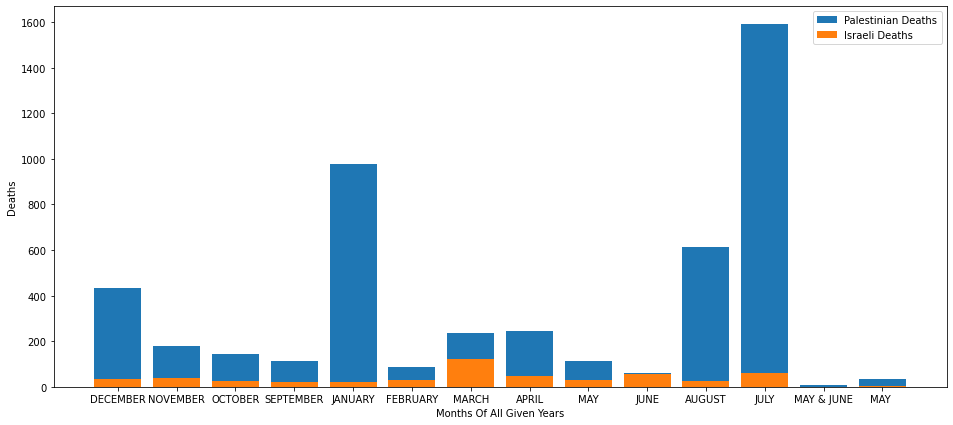

In [44]:
plt.figure(figsize=(16,7))
plt.bar(df1['Month'],df1['Palestinians Killed'] , label = "Palestinian Deaths" ) 
plt.bar(df1['Month'],df1['Israelis Killed'] , label = "Israeli Deaths")
plt.xlabel('Months Of All Given Years')
plt.ylabel('Deaths')
plt.legend()
plt.show()

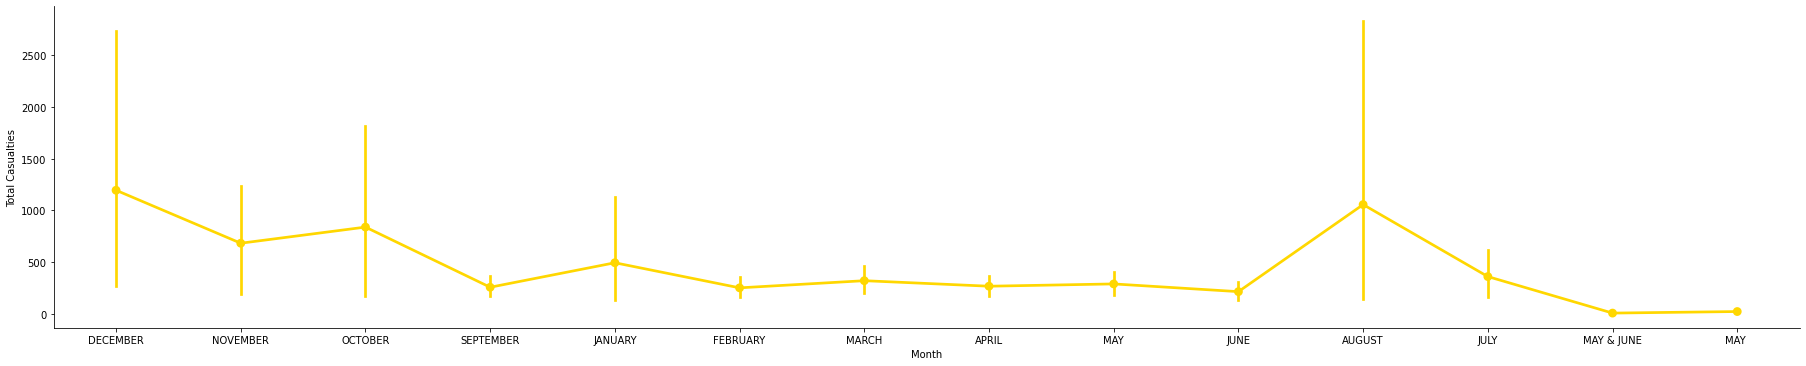

In [45]:
sns.catplot(x='Month', y='Total Casualties', data=df1, color="gold",aspect=5,kind="point")

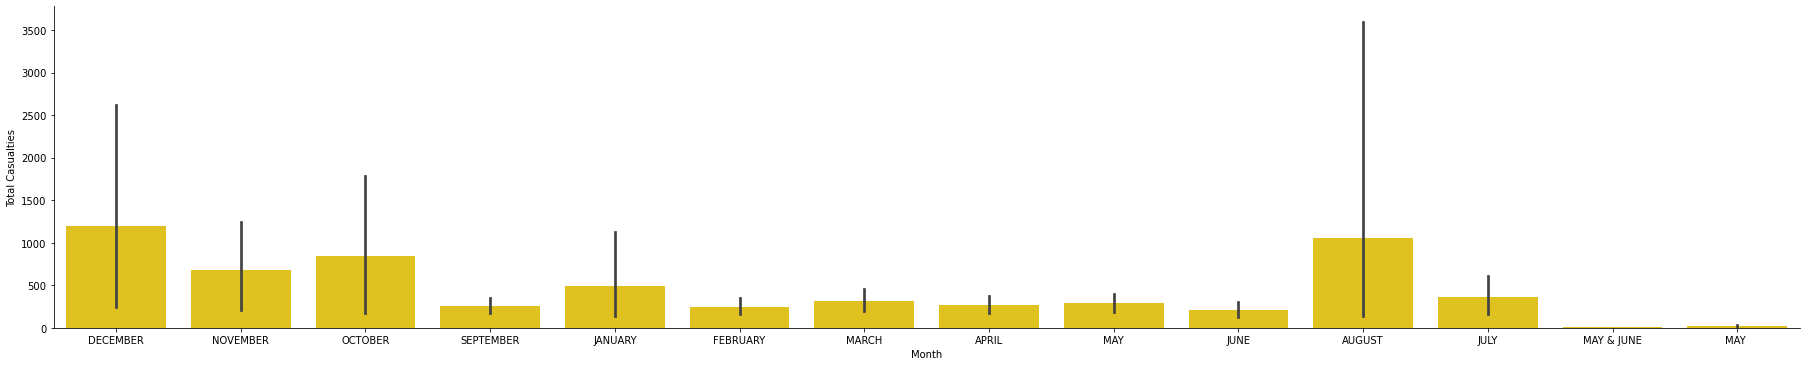

In [64]:
sns.catplot(x='Month', y='Total Casualties', data=df1, color="gold",aspect=5,kind="bar")

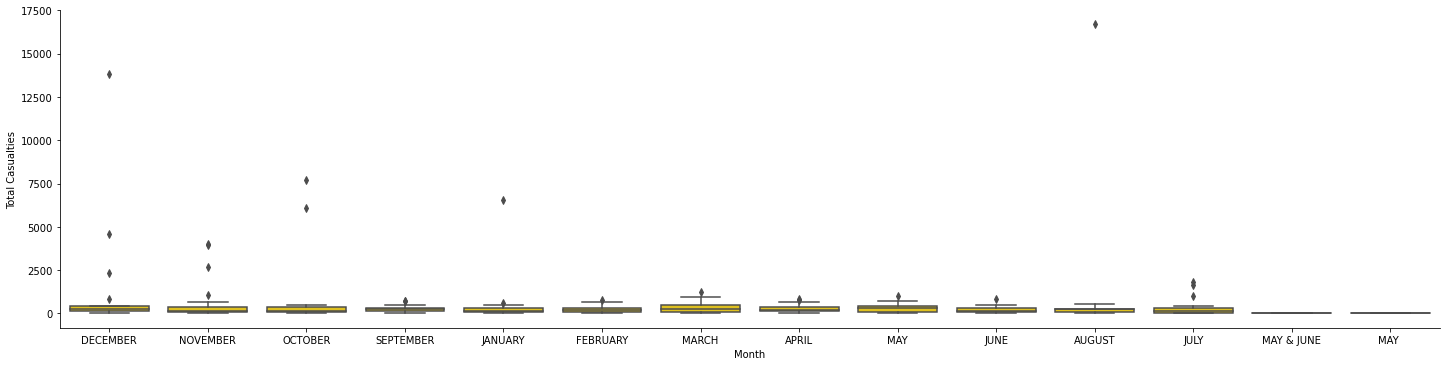

In [65]:
sns.catplot(x='Month', y='Total Casualties', data=df1, color="gold",aspect=4,kind="box")

### The Months Of December, October, November & August see the most bloodshed with August being highest. The months of december, october & november have seen multiple instances of abnormally high casualties. 

## Analysing Whether Years With Highest Casualties Also Saw High Demolitions.
From above analysis we realised that the years 2000, 2007, 2014 And 2015 saw highest bloodshed with 2014 being the worst. Meanwhile years with highest demolitions are 2004, 2019, 2020 and 2013.
There seems to be no major correlation between house demolitions and bloodshed in this conflict.
However 2013-2014-2015 period does have spike in house demolitions which is very consistent with our earlier findings.

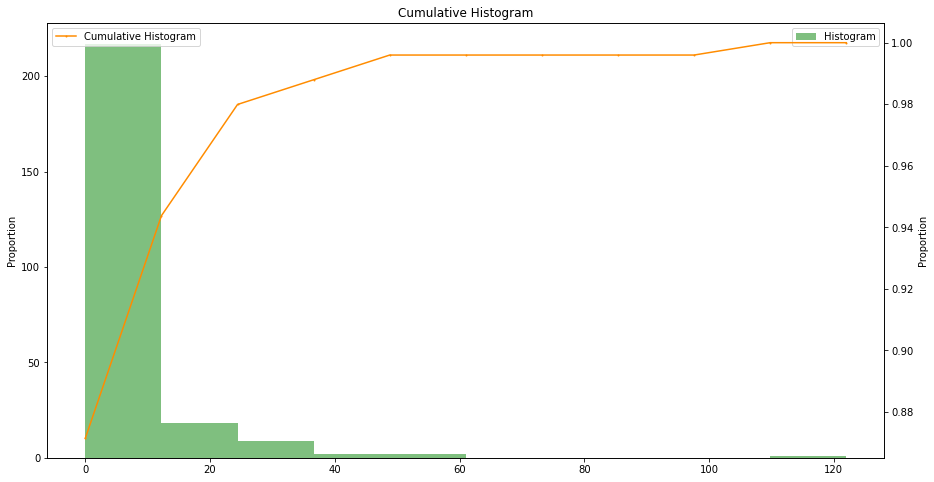

In [47]:
def hist(data, bins, title="Cumulative Histogram", labels=None, range = None):
  fig = plt.figure(figsize=(15, 8))
  ax = plt.axes()
  plt.ylabel("Proportion")
  values, base, _ = plt.hist( data  , bins = bins, alpha = 0.5, color = "green", range = range, label = "Histogram")
  ax_bis = ax.twinx()
  values = np.append(values,0)
  ax_bis.plot( base, np.cumsum(values)/ np.cumsum(values)[-1], color='darkorange', marker='o', linestyle='-', markersize = 1, label = "Cumulative Histogram" )
  plt.xlabel(labels)
  plt.ylabel("Proportion")
  plt.title(title)
  ax_bis.legend();
  ax.legend();
  plt.show()
  return
hist(df1["Israelis Killed"],10)

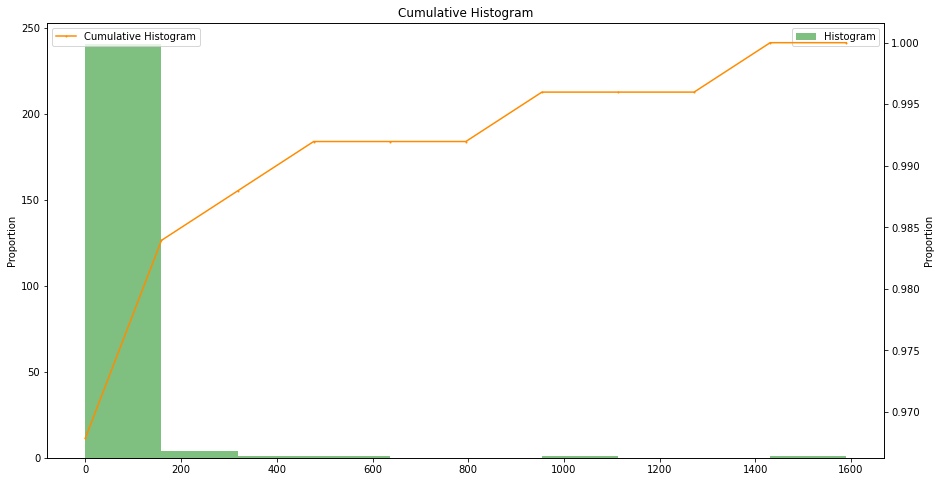

In [48]:
hist(df1["Palestinians Killed"],10)

<AxesSubplot:xlabel='Type of Structure', ylabel='count'>

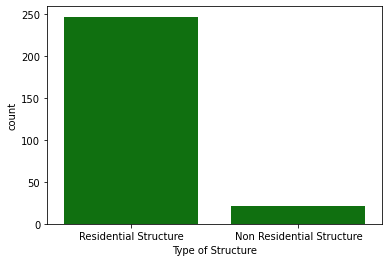

In [49]:
sns.countplot(data=df,x='Type of Structure', color="green")

Majority of the affected buildings are Residential Structures

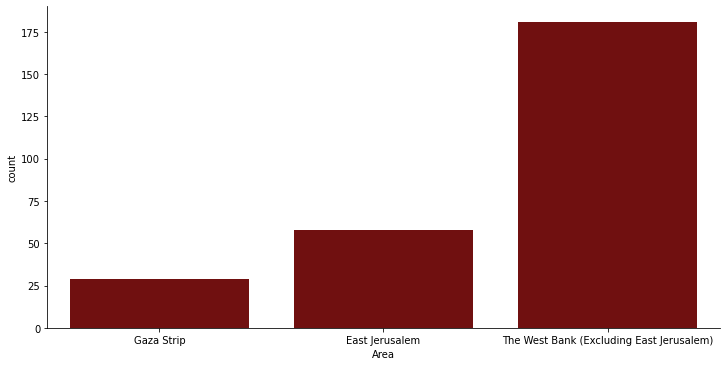

In [50]:
sns.catplot(x='Area', data=df, color="maroon",kind="count",aspect=2)

The West Bank area has seen most house demolitions

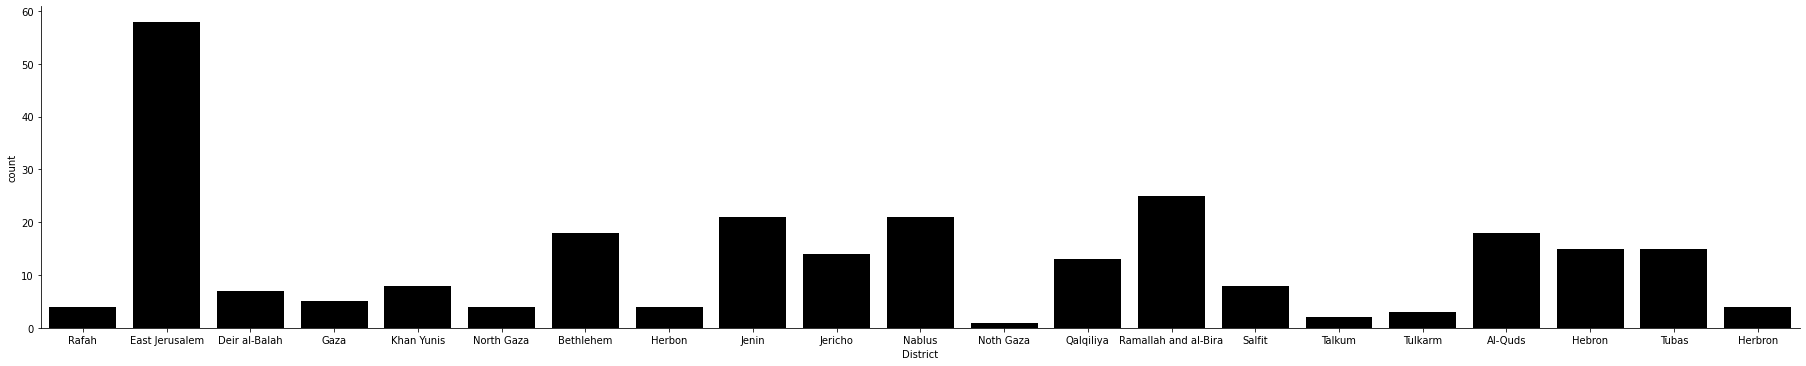

In [51]:
sns.catplot(x='District', data=df, color="black",kind="count",aspect=5)

# Decadal Analysis

In [55]:
df1net

,Palestinians Injuries,Israelis Injuries,Palestinians Killed,Israelis Killed,Palestinian Casualties,Israelis Casualties,Total Casualties
Year,,,,,,,
2000,10603,0,283,41,10886,41,10927
2001,6386,0,470,192,6856,192,7048
2002,4382,0,1032,419,5414,419,5833
2003,2992,0,588,185,3580,185,3765
2004,4009,0,786,104,4795,104,4899
2005,1385,493,190,51,1575,544,2119
2006,3199,377,665,20,3864,397,4261
2007,15426,322,385,12,15811,334,16145
2008,0,0,886,39,886,39,925


In [56]:
df1net=df1net.reset_index()

Calculating Count for Decades

In [57]:
Pal2000=0
Isr2000=0
tot2000=0
pal2010=0
isr2010=0
tot2010=0
for i in range(len(df1net)):
    if df1net["Year"].iloc[i]>=2011:
        pal2010=pal2010+ df1net["Palestinian Casualties"].iloc[i]
        isr2010=isr2010+ df1net["Israelis Casualties"].iloc[i]
        tot2010=tot2010+ df1net["Total Casualties"].iloc[i]
    else:
        Pal2000=Pal2000+ df1net["Palestinian Casualties"].iloc[i]
        Isr2000=Isr2000+ df1net["Israelis Casualties"].iloc[i]
        tot2000=tot2000+ df1net["Total Casualties"].iloc[i]
        

In [58]:
print(f" Palestinian Casualties During 2010s Were {pal2010} While During 2000s It Was {Pal2000}")

 Palestinian Casualties During 2010s Were 58219 While During 2000s It Was 62795


In [59]:
print(f" Israeli Casualties During 2010s Were {isr2010} While During 2000s It Was {Isr2000}")

 Israeli Casualties During 2010s Were 3979 While During 2000s It Was 2449


In [60]:
print(f" Total Casualties During 2010s Were {tot2010} While During 2000s It Was {tot2000}")

 Total Casualties During 2010s Were 62198 While During 2000s It Was 65244


There has been a very marginal decrease in casualties but the conflict still remains deadly as ever.

# Mini Case Studies:

## The Gaza War Of 2014

The 2014 Gaza War, also known as Operation Protective Edge was a military operation launched by Israel on 8 July 2014 in the Hamas-ruled Gaza Strip. Following the kidnapping and murder of three Israeli teenagers by Hamas members, the IDF conducted Operation Brother's Keeper to arrest militant leaders, Hamas fired rockets into Israel and a seven-week conflict broke out. It was one of the deadliest conflicts between the Palestinians and Israel in decades. The combined Israeli airstrikes and ground bombardment and Palestinian rocket attacks resulted in thousands of deaths, the vast majority of which were Gazans.
Hamas's goal was to bring international pressure to bear to lift Israel's blockade of the Gaza Strip, end Israel's offensive, obtain a third party to monitor and guarantee compliance with a ceasefire, release Palestinian prisoners and overcome its political isolation. According to the BBC, in response to rocket fire from the Gaza Strip, Israel launched air raids on Gaza.

On 7 July, after seven Hamas militants died in a tunnel explosion in Khan Yunis which was caused by an Israeli airstrike or an accidental explosion of their own munitions (per the IDF), Hamas assumed responsibility for rockets fired into Israel and launched 40 rockets towards Israel. The operation officially began the following day, and on 17 July, the operation was expanded to an Israeli ground invasion of Gaza with the stated aim of destroying Gaza's tunnel system; Israeli ground forces withdrew on 5 August. On 26 August, an open-ended ceasefire was announced. By that date, the IDF reported that Hamas, Islamic Jihad and other militant groups had fired 4,564 rockets and mortars from Gaza into Israel, with over 735 intercepted in flight and shot down by Iron Dome.
Source: https://en.wikipedia.org/wiki/2014_Gaza_War

In [66]:
df1[df1["Year"]==2014]

,Year,Month,Palestinians Injuries,Israelis Injuries,Palestinians Killed,Israelis Killed,Palestinian Casualties,Israelis Casualties,Total Casualties
167,2014,MAY,265,28,3,1,268,29,297
170,2014,FEBRUARY,216,6,3,0,219,6,225
171,2014,JANUARY,219,9,6,0,225,9,234
169,2014,MARCH,228,5,12,0,240,5,245
168,2014,APRIL,302,15,0,1,302,16,318
166,2014,JUNE,0,0,10,3,10,3,13
161,2014,NOVEMBER,984,55,8,10,992,65,1057
164,2014,AUGUST,13735,2347,614,9,14349,2356,16705
165,2014,JULY,0,0,1590,59,1590,59,1649
160,2014,DECEMBER,350,15,5,0,355,15,370


In [67]:
df1[df1["Year"]==2014]["Total Casualties"].sum()

21697

A total of 21697 People Suffered Casualties In 2014.

The main conflict lasted mainly between July And August which saw 18000+ Casualties

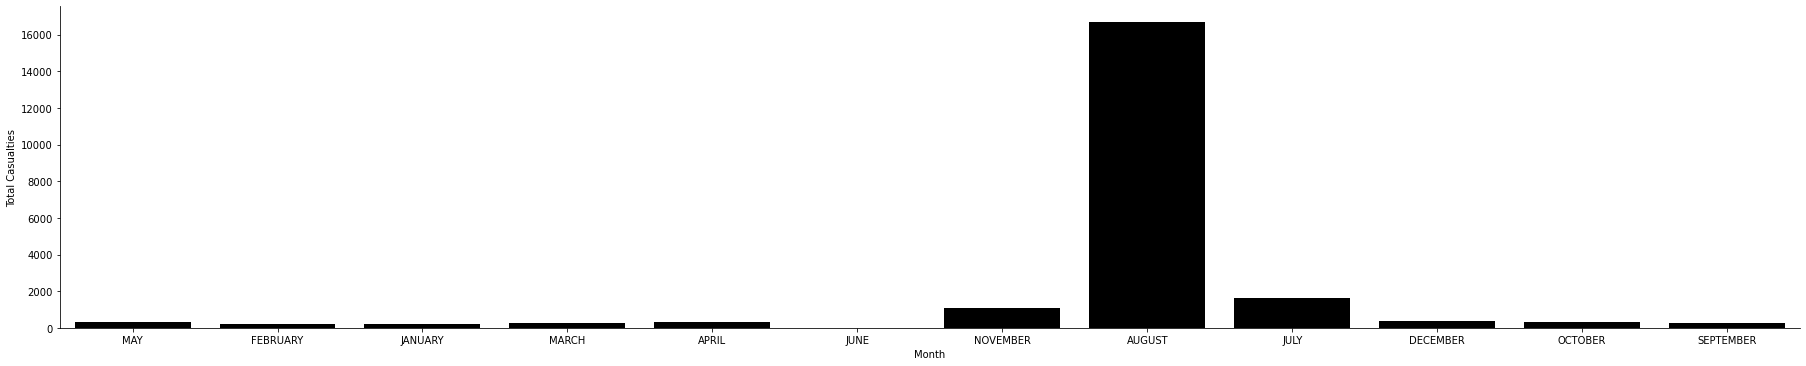

In [71]:
sns.catplot(x='Month', y='Total Casualties', data=df1[df1["Year"]==2014], color="black",aspect=5,kind="bar")

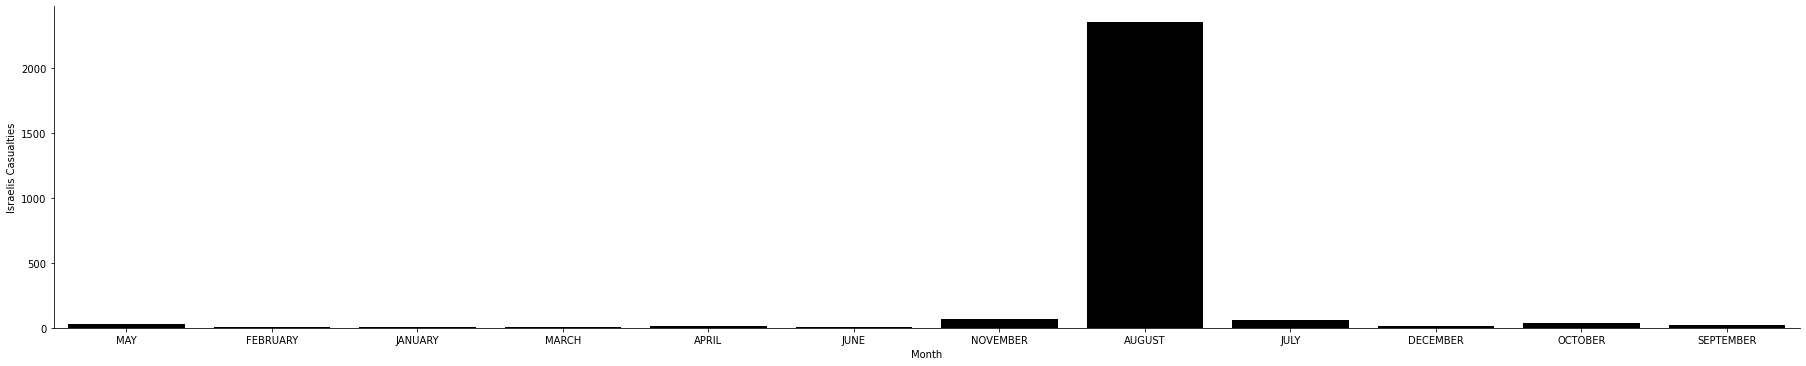

In [73]:
sns.catplot(x='Month', y='Israelis Casualties', data=df1[df1["Year"]==2014], color="black",aspect=5,kind="bar")

The majority of Israeli deaths take place in August, during the raids & due to rockets by hamas.

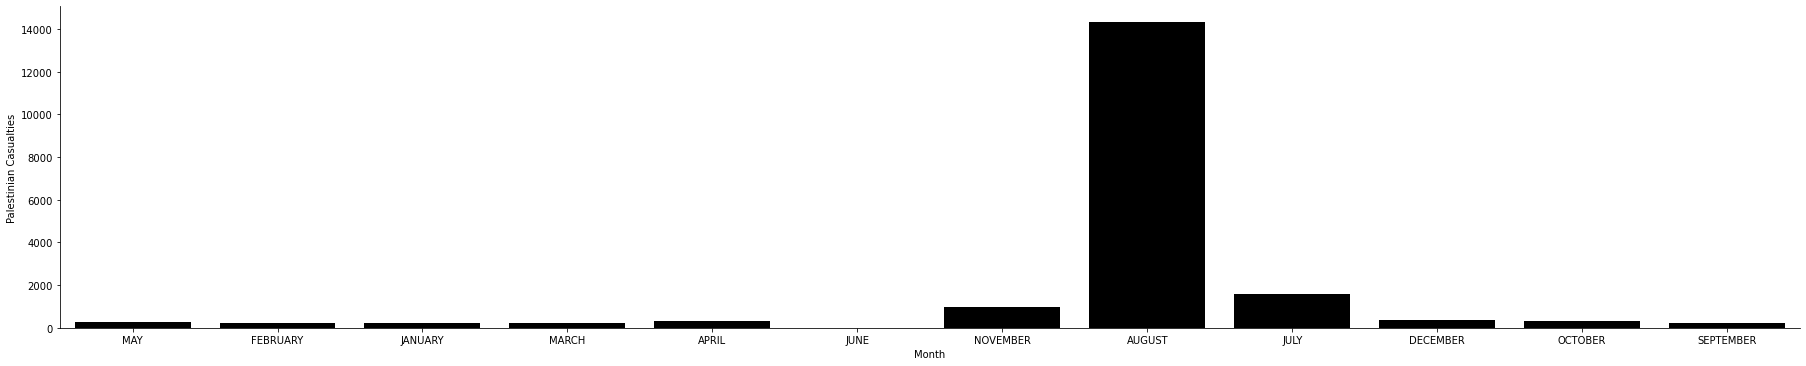

In [74]:
sns.catplot(x='Month', y='Palestinian Casualties', data=df1[df1["Year"]==2014], color="black",aspect=5,kind="bar")

The majority of Palestinian deaths take place in August, November & July during the raids & due to Airstrikes.

In [93]:
df[df["Year"]==2014]["Housing Units"].sum()

259

## The Palestine War Of 2007

The Battle of Gaza, also referred to as Hamas' takeover of Gaza, was a military conflict between Fatah and Hamas(Two Militias From Palestine), that took place in the Gaza Strip at 2007. It was a prominent event in the Fatah–Hamas conflict, centered on the struggle for power, after Fatah lost the parliamentary elections of 2006. Hamas fighters took control of the Gaza Strip and removed Fatah officials. The battle resulted in the dissolution of the unity government and the de facto division of the Palestinian territories into two entities, the West Bank governed by the Palestinian National Authority, and Gaza governed by Hamas.

In [75]:
df1[df1["Year"]==2007]

,Year,Month,Palestinians Injuries,Israelis Injuries,Palestinians Killed,Israelis Killed,Palestinian Casualties,Israelis Casualties,Total Casualties
87,2007,JANUARY,104,12,10,3,114,15,129
86,2007,FEBRUARY,256,35,12,1,268,36,304
85,2007,MARCH,153,15,9,0,162,15,177
84,2007,APRIL,115,22,16,0,131,22,153
83,2007,MAY,281,30,62,2,343,32,375
82,2007,JUNE,162,19,40,0,202,19,221
80,2007,AUGUST,154,56,47,0,201,56,257
79,2007,SEPTEMBER,135,87,34,0,169,87,256
78,2007,OCTOBER,152,13,36,2,188,15,203
77,2007,NOVEMBER,127,6,31,1,158,7,165


In [87]:
df1[df1["Year"]==2007]["Total Casualties"].sum()

16145

In [88]:
df1[df1["Year"]==2007]["Palestinian Casualties"].sum()

15811

The total casualties in 2007 was 16145 and about 97% of them were Palestinians which is way higher.

The Palestinian Casualties are abnormally high because the conflict was between two Gazan militias and didnt involve israel.

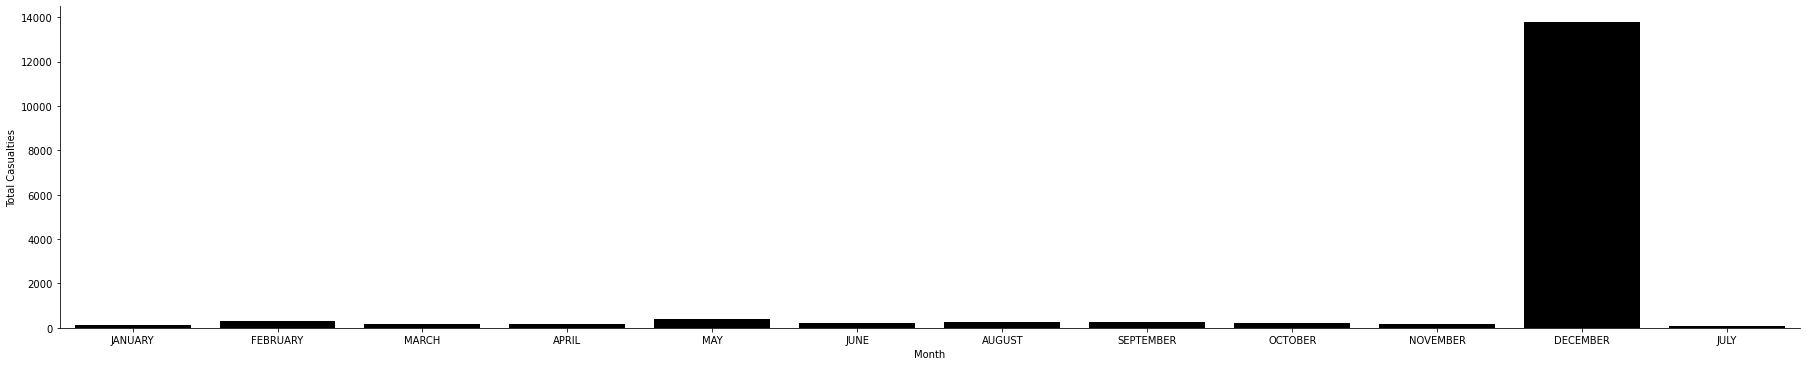

In [94]:
sns.catplot(x='Month', y='Total Casualties', data=df1[df1["Year"]==2007], color="black",aspect=5,kind="bar")

In [91]:
df[df["Year"]==2007]["Housing Units"].sum()

146

A total of 146 structures were illegally demolished in 2007.